### In this model we have to predict the number of operational cycles after the last cycle that the engine will continue to operate.

#Import the Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle
model=pickle.load(open('/content/drive/MyDrive/CMAPSSData/RUL/dtr_Rcv.pkl','rb'))

In [ ]:
import csv

def txt_csv(filelink, name):
    with open(filelink, 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split() for line in stripped if line)
        with open(f'{name}.csv', 'w', newline='') as out_file:
            writer = csv.writer(out_file)
            writer.writerow(('Unit Number', 'Time in cycle', 'operational setting 1', 'operational setting 2',
                             'operational setting 3', 'sensor measurement 1', 'sensor measurement 2',
                             'sensor measurement 3', 'sensor measurement 4', 'sensor measurement 5',
                             'sensor measurement 6', 'sensor measurement 7', 'sensor measurement 8',
                             'sensor measurement 9', 'sensor measurement 10', 'sensor measurement 11',
                             'sensor measurement 12', 'sensor measurement 13', 'sensor measurement 14',
                             'sensor measurement 15', 'sensor measurement 16', 'sensor measurement 17',
                             'sensor measurement 18', 'sensor measurement 19', 'sensor measurement 20',
                             'sensor measurement 21'))
            writer.writerows(lines)


Made a function to import train/test files directly thorugh drive without looking for them or copying their link over and over again.

In [ ]:
def open_train_test_files(i, number):
    if i == 'train':
        df = pd.read_csv(f'/content/drive/MyDrive/CMAPSSData/train/train_FD00{number}.csv')
    elif i == 'test':
        df = pd.read_csv(f'/content/drive/MyDrive/CMAPSSData/test/test_FD00{number}.csv')
    elif i=='RUL':
        df=pd.read_csv(f'/content/drive/MyDrive/CMAPSSData/RUL/RUL_FD00{number}.csv')
    else:
        raise ValueError("Invalid argument for 'i'. Expected 'train' or 'test'.")
    return df

In [ ]:
df1=open_train_test_files('train',1).drop('Unnamed: 0',axis=1)
df1.head()

,Unit Number,Time in cycle,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
df1_test=open_train_test_files('test',1)
df1_test.head()

,Unit Number,Time in cycle,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


#EDA and some graphs to understand the dataset carefully.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

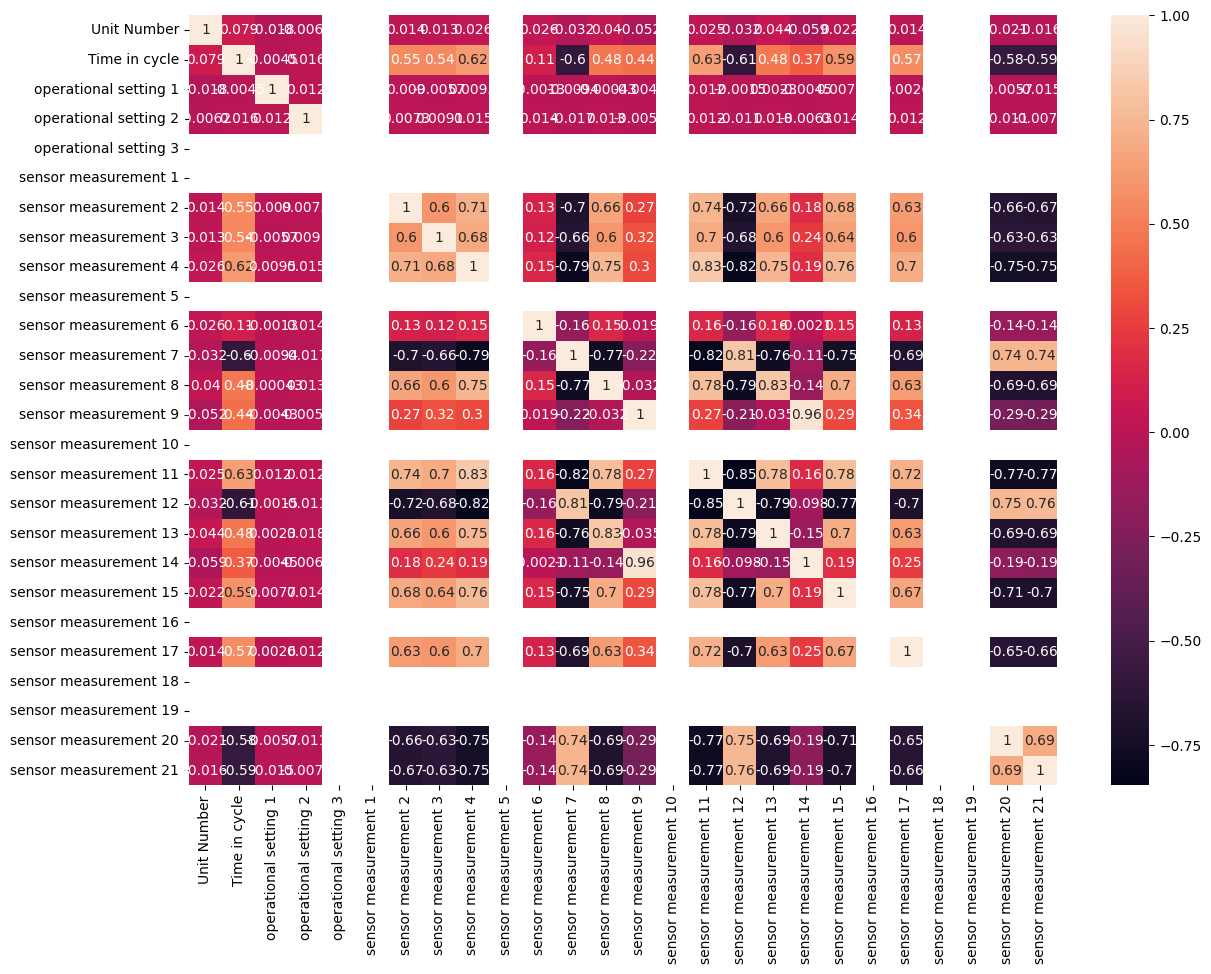

In [ ]:
data_corr=df1.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(data_corr, annot=True, annot_kws={"size": 10})
plt.show()

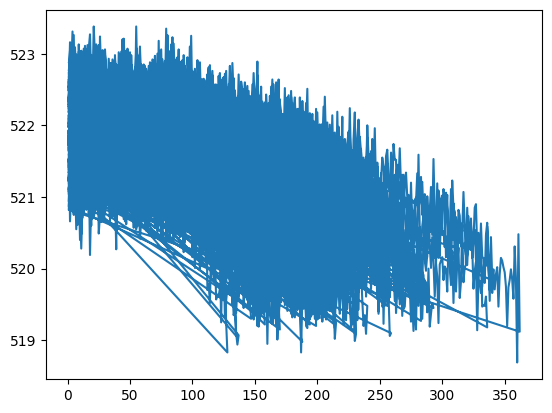

In [ ]:
plt.plot(df1['Time in cycle'],df1['sensor measurement 12'])
plt.show()

In [ ]:
def all_plots():
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
    ax = ax.flatten()

    for i in range(1, 22):
        ax[i-1].plot(df1['Time in cycle'], df1[f'sensor measurement {i}'],color='salmon')
        ax[i-1].set_xlabel('Time in cycle')
        ax[i-1].set_ylabel(f'Sensor measurement {i}')
        ax[i-1].set_title(f'Sensor {i}')
    for j in range(21, 25):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

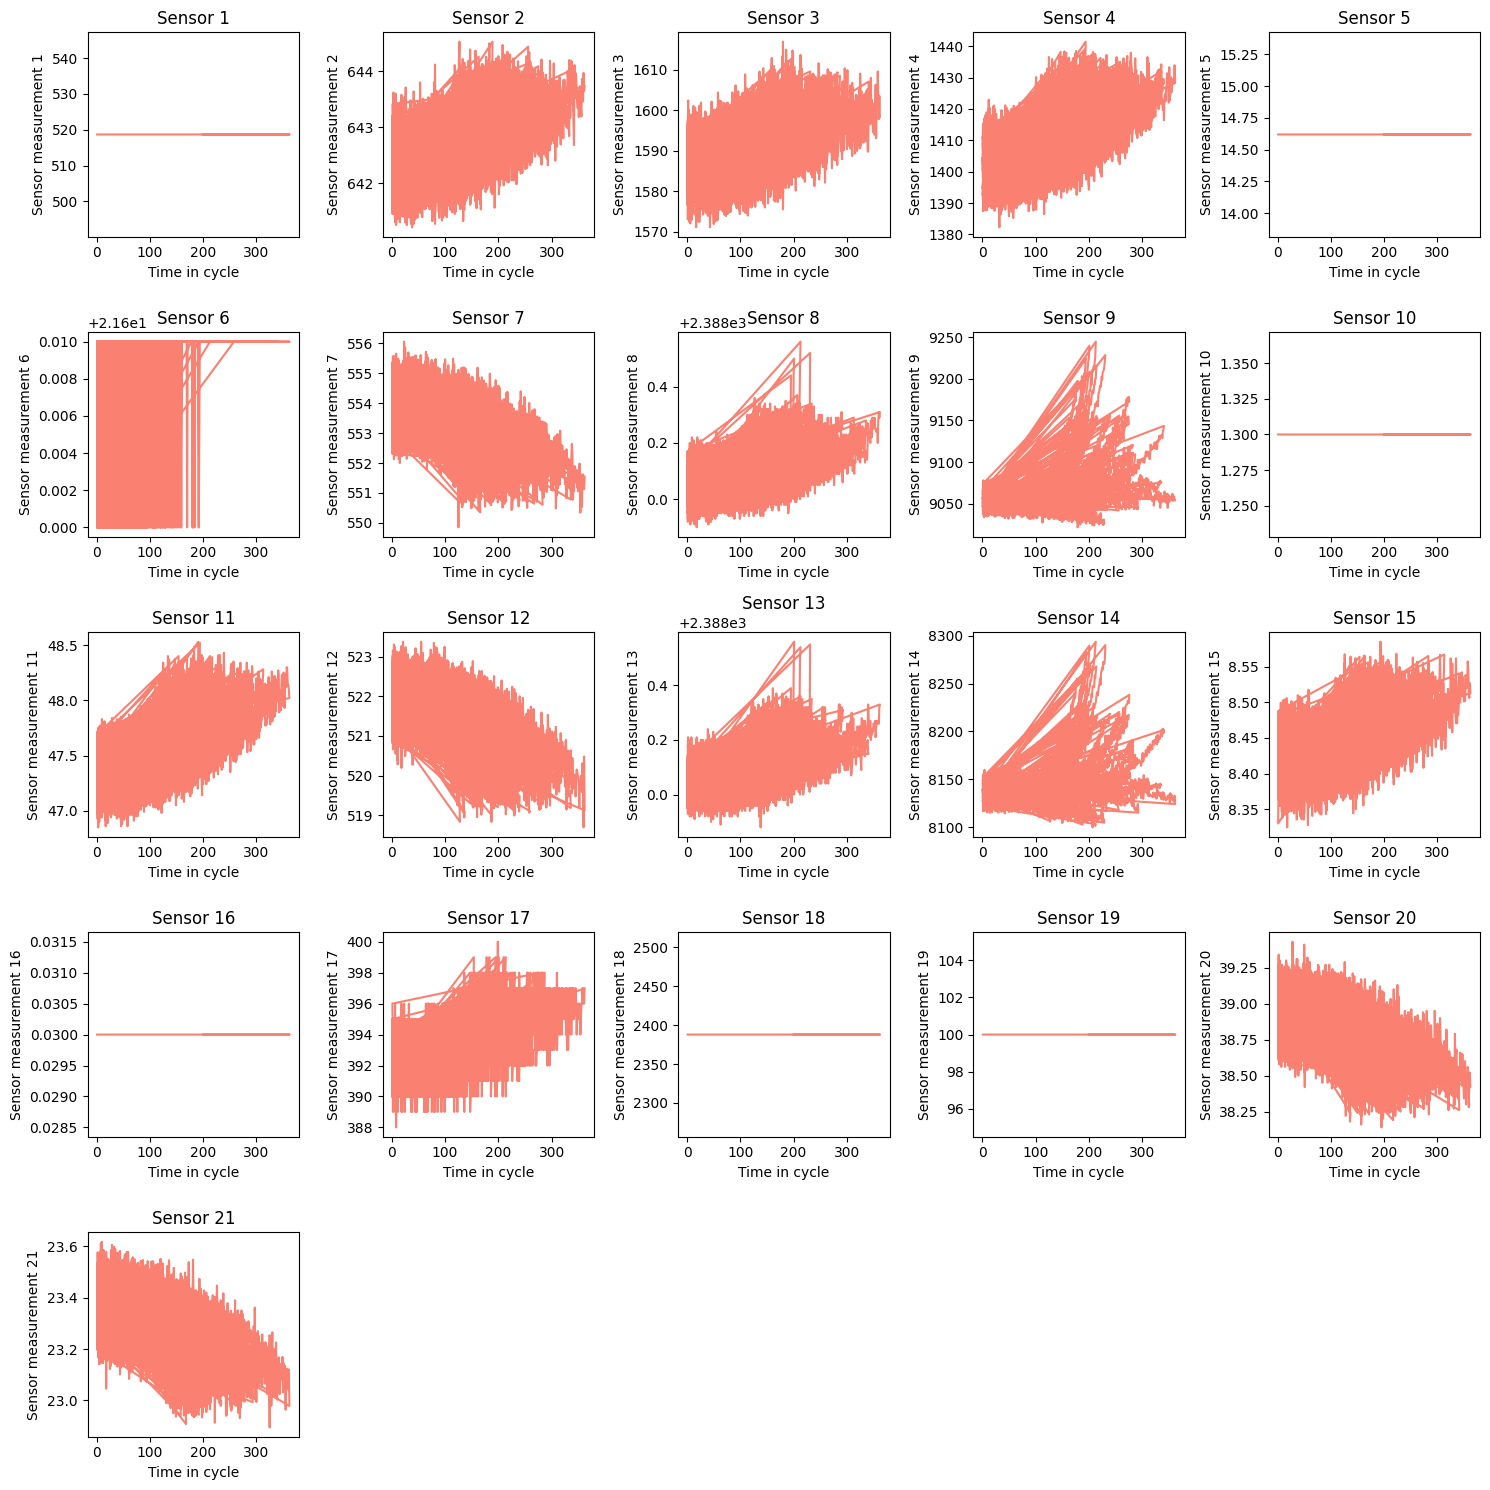

In [ ]:
all_plots()

After seeing the above implemented graphs I selected the graphs which are useful sensor measurment 2,3,4,11,15. which are useful to our train dataset.


In [ ]:
df1=df1.drop(['operational setting 3','sensor measurement 1','sensor measurement 5','sensor measurement 6','sensor measurement 7','sensor measurement 8','sensor measurement 9','sensor measurement 10','sensor measurement 12','sensor measurement 13','sensor measurement 14','sensor measurement 16','sensor measurement 17','sensor measurement 18','sensor measurement 19','sensor measurement 20','sensor measurement 21'],axis=1)

In [ ]:
df1_test=df1_test.drop(['operational setting 3','sensor measurement 1','sensor measurement 5','sensor measurement 6','sensor measurement 7','sensor measurement 8','sensor measurement 9','sensor measurement 10','sensor measurement 12','sensor measurement 13','sensor measurement 14','sensor measurement 16','sensor measurement 17','sensor measurement 18','sensor measurement 19','sensor measurement 20','sensor measurement 21'],axis=1)

In [ ]:
df1.head()

,Unit Number,Time in cycle,operational setting 1,operational setting 2,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 11,sensor measurement 15
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,47.47,8.4195
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,47.49,8.4318
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,47.27,8.4178
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,47.13,8.3682
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,47.28,8.4294


In [ ]:
df1_test.head()

,Unit Number,Time in cycle,operational setting 1,operational setting 2,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 11,sensor measurement 15
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,47.20,8.4052
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,47.50,8.3803
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,47.50,8.4441
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,47.28,8.3917
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,47.31,8.4031


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1.iloc[:,4:]=ss.fit_transform(df1.iloc[:,4:])
df1_test.iloc[:,4:]=ss.transform(df1_test.iloc[:,4:])

In [ ]:
df1

,Unit Number,Time in cycle,operational setting 1,operational setting 2,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 11,sensor measurement 15
0,1,1,-0.0007,-0.0004,-1.721725,-0.134255,-0.925936,-0.266467,-0.603816
1,1,2,0.0019,-0.0003,-1.061780,0.211528,-0.643726,-0.191583,-0.275852
2,1,3,-0.0043,0.0003,-0.661813,-0.413166,-0.525953,-1.015303,-0.649144
3,1,4,0.0007,0.0000,-0.661813,-1.261314,-0.784831,-1.539489,-1.971665
4,1,5,-0.0019,-0.0002,-0.621816,-1.251528,-0.301518,-0.977861,-0.339845
...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,1.618000,1.216258,2.188375,1.980044,1.425294
20627,100,197,-0.0016,-0.0005,1.717992,2.279706,2.738351,1.867718,1.913240
20628,100,198,0.0004,0.0000,1.478011,1.946971,2.138377,2.054927,3.265092
20629,100,199,-0.0011,0.0003,1.098043,2.403666,1.955051,3.178182,2.579834


In [ ]:
means=df1.iloc[:, 5:].mean(axis=1)
means_test=df1_test.iloc[:,5:].mean(axis=1)
df1['Fused values']=means
df1_test['Fused values']=means_test
df1=df1.drop(df1.iloc[:,4:26],axis=1)
df1_test=df1_test.drop(df1_test.iloc[:,4:26],axis=1)

In [ ]:
df1.head()

,Unit Number,Time in cycle,operational setting 1,operational setting 2
0,1,1,-0.0007,-0.0004
1,1,2,0.0019,-0.0003
2,1,3,-0.0043,0.0003
3,1,4,0.0007,0.0000
4,1,5,-0.0019,-0.0002


In [ ]:
max(df1['Unit Number'])

100

In [ ]:
df1_test.head()

,Unit Number,Time in cycle,operational setting 1,operational setting 2
0,1,1,0.0023,0.0003
1,1,2,-0.0027,-0.0003
2,1,3,0.0003,0.0001
3,1,4,0.0042,0.0000
4,1,5,0.0014,0.0000


In [ ]:
max_time_in_cycle = df1.groupby('Unit Number')['Time in cycle'].transform('max')
df1['Time difference'] = max_time_in_cycle - df1['Time in cycle']

In [ ]:
df1

,Unit Number,Time in cycle,operational setting 1,operational setting 2,Time difference
0,1,1,-0.0007,-0.0004,191
1,1,2,0.0019,-0.0003,190
2,1,3,-0.0043,0.0003,189
3,1,4,0.0007,0.0000,188
4,1,5,-0.0019,-0.0002,187
...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,4
20627,100,197,-0.0016,-0.0005,3
20628,100,198,0.0004,0.0000,2
20629,100,199,-0.0011,0.0003,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Minmax=MinMaxScaler()
df1.iloc[:,4:]=Minmax.fit_transform(df1.iloc[:,4:])
df1

,Unit Number,Time in cycle,operational setting 1,operational setting 2,Time difference
0,1,1,-0.0007,-0.0004,0.529086
1,1,2,0.0019,-0.0003,0.526316
2,1,3,-0.0043,0.0003,0.523546
3,1,4,0.0007,0.0000,0.520776
4,1,5,-0.0019,-0.0002,0.518006
...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,0.011080
20627,100,197,-0.0016,-0.0005,0.008310
20628,100,198,0.0004,0.0000,0.005540
20629,100,199,-0.0011,0.0003,0.002770


# All values are set not we just have to use some of the models and make it better than before.

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop('Time difference',axis=1)
Y=df1['Time difference']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,n_estimators=200)
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [ ]:
model.score(X_test,Y_test)

0.9983774311118689

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor()
knn_model.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
knn_model.score(X_test,Y_test)

0.6791001945955109

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
dtr.score(X_test,Y_test)

0.9987779109094231

In [ ]:
Y_true=np.array(Y_test)

In [ ]:
lr.score(X_test,Y_test)

0.5652335820066634

In [ ]:
dtr.predict(X_test)

array([0.37950139, 0.00831025, 0.60387812, ..., 0.33795014, 0.28531856,
       0.50969529])

In [ ]:
model.predict(X_test)

array([0.37937673, 0.01180055, 0.58591413, ..., 0.34038781, 0.28490305,
       0.51296399])

In [ ]:
knn_model.predict(X_test)

array([0.32022161, 0.15401662, 0.56454294, ..., 0.41274238, 0.1900277 ,
       0.35401662])

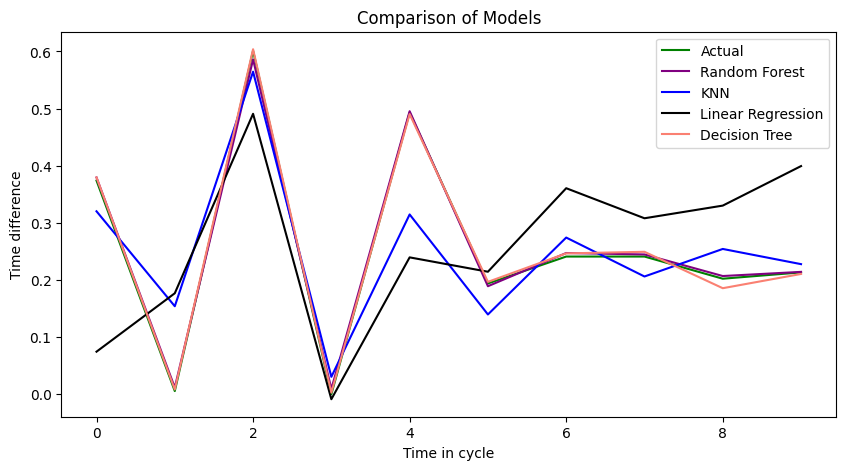

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(Y_true[:10],color='green')
plt.plot(model.predict(X_test[:10]),color='purple')
plt.plot(knn_model.predict(X_test[:10]),color='blue')
plt.plot(lr.predict(X_test[:10]),color='black')
plt.plot(dtr.predict(X_test[:10]),color='salmon')
plt.legend(['Actual','Random Forest','KNN','Linear Regression','Decision Tree'])
plt.title('Comparison of Models')
plt.xlabel('Time in cycle')
plt.ylabel('Time difference')
plt.show()

It is visible from the above that the values predicted by the decision Tree is nealry equal to the True values.

# Hyperparamter Tunning

In [ ]:
param_grid = {
    'ccp_alpha': np.linspace(0.0, 0.1, 11),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None] + list(np.arange(5, 51, 5)),
    'max_features': [None, 'auto', 'sqrt', 'log2'] + list(np.arange(0.1, 1.1, 0.1)),
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10)),
    'min_impurity_decrease': np.linspace(0.0, 0.2, 21),
    'min_samples_leaf': list(np.arange(1, 21, 1)),
    'min_samples_split': list(np.arange(2, 21, 1)),
    'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 11),
    'random_state': [None, 0, 42, 99, 123],
    'splitter': ['best', 'random']
}

In [ ]:
param_grid_rf= {
    'n_estimators': np.arange(10, 301, 10),
    'ccp_alpha': np.linspace(0.0, 0.1, 11),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None] + list(np.arange(5, 51, 5)),
    'max_features': ['auto', 'sqrt', 'log2'] + list(np.arange(0.1, 1.1, 0.1)),
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10)),
    'min_impurity_decrease': np.linspace(0.0, 0.2, 21),
    'min_samples_leaf': list(np.arange(1, 21, 1)),
    'min_samples_split': list(np.arange(2, 21, 1)),
    'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 11),
    'random_state': [None, 0, 42, 99, 123],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dtr_Rcv=RandomizedSearchCV(n_jobs=-1,estimator=dtr,param_distributions=param_grid,cv=5,n_iter=5,random_state=42,verbose=2)
dtr_Rcv.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2', 0.1, 0.2,
                                                         0.3000000...
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'min_weight_fraction_leaf': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
                                        'random_state': [None, 0, 42, 99, 123],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_rcv=RandomizedSearchCV(n_jobs=-1,estimator=model,param_distributions=param_grid_rf,cv=5,n_iter=5,random_state=42,verbose=2)
model_rcv.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'max_fea...
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'min_weight_fraction_leaf': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300]),
                                        'random_state': [None, 0, 42, 99, 123]},
                   random_state=42, verbose=2)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# dtr_Gcv=GridSearchCV(n_jobs=-1,estimator=dtr,param_grid=param_grid,cv=5,verbose=2)
# dtr_Gcv.fit(X,Y)

In [ ]:
dtr_Rcv.score(X_test,Y_test)

-0.007363852888735867

In [ ]:
model_rcv.score(X_test,Y_test)

-0.008556724372716484

In [ ]:
dtr.predict(df1_test)

array([0.52354571, 0.52631579, 0.52354571, ..., 0.01108033, 0.01108033,
       0.00831025])

In [ ]:
model.predict(df1_test)

array([0.52699446, 0.52407202, 0.53034626, ..., 0.01220222, 0.01060942,
       0.00912742])

In [ ]:
df1_test['predicted']=model.predict(df1_test)
df1_test

,Unit Number,Time in cycle,operational setting 1,operational setting 2,predicted
0,1,1,0.0023,0.0003,0.526994
1,1,2,-0.0027,-0.0003,0.524072
2,1,3,0.0003,0.0001,0.530346
3,1,4,0.0042,0.0000,0.537244
4,1,5,0.0014,0.0000,0.525485
...,...,...,...,...,...
13091,100,194,0.0049,0.0000,0.020803
13092,100,195,-0.0011,-0.0001,0.015055
13093,100,196,-0.0006,-0.0003,0.012202
13094,100,197,-0.0038,0.0001,0.010609


In [ ]:
df1_test['predicted']=dtr.predict(df1_test.iloc[:,:4])
df1_test

,Unit Number,Time in cycle,operational setting 1,operational setting 2,predicted
0,1,1,0.0023,0.0003,0.523546
1,1,2,-0.0027,-0.0003,0.526316
2,1,3,0.0003,0.0001,0.523546
3,1,4,0.0042,0.0000,0.526316
4,1,5,0.0014,0.0000,0.518006
...,...,...,...,...,...
13091,100,194,0.0049,0.0000,0.013850
13092,100,195,-0.0011,-0.0001,0.013850
13093,100,196,-0.0006,-0.0003,0.011080
13094,100,197,-0.0038,0.0001,0.011080


In [ ]:
last_predicted_values=df1_test.groupby('Unit Number').last()
last_predicted_values

,Time in cycle,operational setting 1,operational setting 2,predicted
Unit Number,,,,
1,31,-0.0006,0.0004,0.445983
2,49,0.0018,-0.0001,0.659280
3,126,-0.0016,0.0004,0.146814
4,106,0.0012,0.0004,0.232687
5,98,-0.0013,-0.0004,0.468144
...,...,...,...,...
96,97,-0.0006,0.0003,0.662050
97,134,0.0013,-0.0001,0.191136
98,121,0.0017,0.0001,0.102493


In [ ]:
df = pd.read_fwf("/content/drive/MyDrive/CMAPSSData/RUL/RUL_FD001.txt",header=None)
df.columns = ['RUL']
df.to_csv('RUL.csv',columns=['RUL'],index=False)

In [ ]:
RUL_FD001=pd.read_csv('RUL.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Minmax=MinMaxScaler()
RUL_FD001=Minmax.fit_transform(RUL_FD001)

In [ ]:
RUL_FD001.shape

(100, 1)

In [ ]:
from sklearn.metrics import r2_score
r2_score(last_predicted_values.iloc[:,3:],RUL_FD001)

-3.056012741896108

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(last_predicted_values.iloc[:,3:],RUL_FD001)

0.1357854504886526

In [ ]:
import pickle
model=pickle.load(open('/content/drive/MyDrive/CMAPSSData/RUL/dtr_Rcv.pkl','rb'))

In [ ]:
model.fit(last_predicted_values.iloc[:,:4],last_predicted_values.iloc[:,4:])

<ipython-input-207-d492e9f9d70a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(last_predicted_values.iloc[:,:4],last_predicted_values.iloc[:,4:])


RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [ ]:
import pickle
pickle.dump(model,open('/content/drive/MyDrive/CMAPSSData/RUL/dtr_Rcv.pkl_final','wb'))